                           This is an Advanced Version 

### Importing the Necessary Libraries 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# plotly 
from chart_studio import plotly
import plotly as py 

import plotly.graph_objs as go 
import plotly.express as px
from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)



# sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, Lasso, ElasticNet, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

from mlxtend.regressor import StackingRegressor

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



### Load The Data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

                                 **SalePrice**  

the property's sale price in dollars.  
This is the target variable that you're trying to predict.  


                                    **Areas**  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
GrLivArea: Above grade (ground) living area square feet  
TotalBsmtSF: Total square feet of basement area  
MasVnrArea: Masonry veneer area in square feet  
GarageArea: Size of garage in square feet  

LowQualFinSF: Low quality finished square feet (all floors)  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  

WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
  
  
                           **Class, Condition, Quality**  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
MSSubClass: The building class  
MSZoning: The general zoning classification  
Neighborhood: Physical locations within Ames city limits  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling   
Foundation: Type of foundation  
Functional: Home functionality rating  

RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
  
KitchenQual: Kitchen quality  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
FireplaceQu: Fireplace quality  
  
PoolQC: Pool quality  
Fence: Fence quality 

Utilities: Type of utilities available  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  


                         **Rooms, numbers**  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  

Fireplaces: Number of fireplaces  


                      **Lot, Street, Alley**  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
PavedDrive: Paved driveway 


                               **BASEMENT**  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  


                                **Garage**  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity    
GarageQual: Garage quality  
GarageCond: Garage condition  

                                 **Years**  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
MoSold: Month Sold  
YrSold: Year Sold  

 
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  

SaleType: Type of sale  
SaleCondition: Condition of sale 

## PART 1 : Exploratory Data Analysis

### 1.1 First Look

In [4]:
print('The shape of the traingin set is ',df_train.shape)
print(' ')
print('X' *43)
print(' ')
print('The shape of the testing set is ',df_test.shape)

The shape of the traingin set is  (1460, 81)
 
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 
The shape of the testing set is  (1459, 80)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Drop the ID Column from Both Data Sets (Train, and Test)

df_train.drop('Id', axis= 1, inplace = True)
id_test = df_test['Id']
df_test.drop('Id', axis= 1, inplace = True)

In [9]:
df_train.describe(include = ['float64', 'int64']).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [10]:
df_train.describe(include = 'object').transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


we have 37 column/feature which are float64 and int64


we hace 43 column/feature which are object

### 1.2 Handling Missing Values

In [11]:
numerical_cols = list(df_train.describe(include = ['float64', 'int64']).transpose().index)

In [12]:
categorical_cols = list(df_train.describe(include = 'object').transpose().index)

In [13]:
def make_null_table (df):

    per = []
    counts = []
    types = []
    for col in df.columns:
        null_perc = df[col].isnull().sum()/len(df) * 100
        per.append(null_perc)
        null_count = df[col].isnull().sum()
        counts.append(null_count)
        typ = df[col].dtype
        types.append(typ)
        names = df.columns

    null_table = pd.concat(

    [pd.Series(names, name = 'Col Name'),
    pd.Series(types, name = 'Col Type'),
    pd.Series(per, name =  'Percentage'),
    pd.Series(counts, name =  'Null Counts')],
    axis = 1
    )
    return null_table[null_table['Null Counts'] > 0].sort_values(by = 'Null Counts', ascending= False).set_index('Col Name')

    

In [14]:
df_train_null = make_null_table(df_train)

In [15]:
df_test_null = make_null_table(df_test)

In [16]:
df_train_null

,Col Type,Percentage,Null Counts
Col Name,,,
PoolQC,object,99.520548,1453
MiscFeature,object,96.301370,1406
Alley,object,93.767123,1369
Fence,object,80.753425,1179
FireplaceQu,object,47.260274,690
LotFrontage,float64,17.739726,259
GarageType,object,5.547945,81
GarageYrBlt,float64,5.547945,81
GarageFinish,object,5.547945,81


In [17]:
df_test_null

,Col Type,Percentage,Null Counts
Col Name,,,
PoolQC,object,99.794380,1456
MiscFeature,object,96.504455,1408
Alley,object,92.666210,1352
Fence,object,80.123372,1169
FireplaceQu,object,50.034270,730
LotFrontage,float64,15.558602,227
GarageCond,object,5.346127,78
GarageYrBlt,float64,5.346127,78
GarageQual,object,5.346127,78


WAIT , Before Dropping Any column.. Lets Study Those Features Which Has many -Almost All- Null Values

In [18]:
df_train_null.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object', name='Col Name')

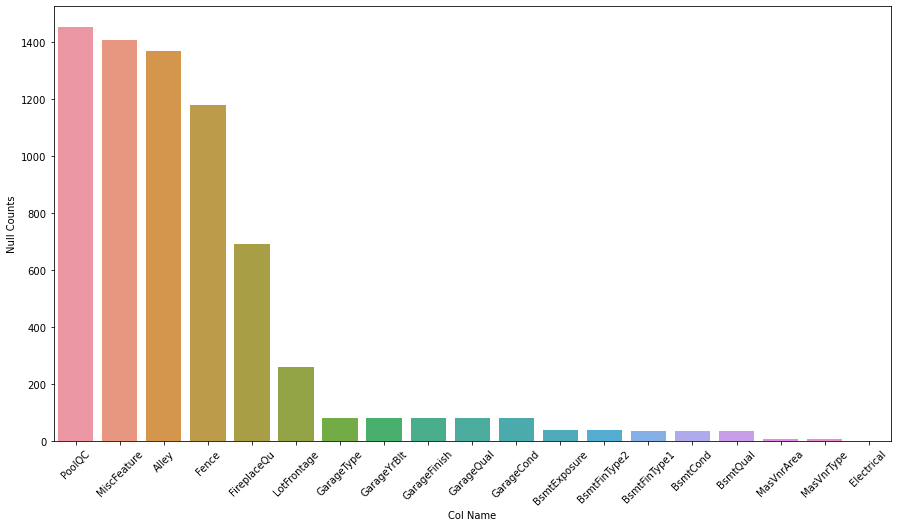

In [19]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x = df_train_null.index, y = df_train_null['Null Counts'], ax = ax)
plt.xticks(rotation = 45)
plt.show()

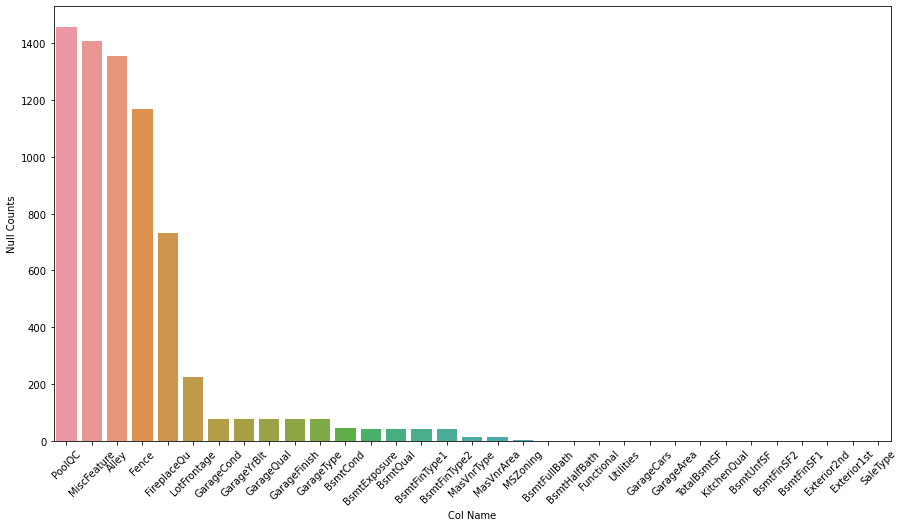

In [20]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x = df_test_null.index, y = df_test_null['Null Counts'], ax = ax)
plt.xticks(rotation = 45)
plt.show()

In [21]:
trace1 = go.Bar(x = df_train_null.index, 
                y = df_train_null['Null Counts'],
                name="df_train", 
                text = df_train_null.index)

trace2 = go.Bar(x = df_test_null.index, 
                y = df_test_null['Null Counts'],
                name="df_test", 
                text = df_test_null.index)

data = [trace1, trace2]

layout = dict(title = "NaN in test and train", 
              xaxis=dict(ticklen=10, zeroline= False),
              yaxis=dict(title = "number of rows", side='left', ticklen=10,),                                  
              legend=dict(orientation="v", x=1.05, y=1.0),
              autosize=False, width=750, height=500,
              barmode='stack'
              )

fig = dict(data = data, layout = layout)
iplot(fig)

In [22]:
df_train_null

,Col Type,Percentage,Null Counts
Col Name,,,
PoolQC,object,99.520548,1453
MiscFeature,object,96.301370,1406
Alley,object,93.767123,1369
Fence,object,80.753425,1179
FireplaceQu,object,47.260274,690
LotFrontage,float64,17.739726,259
GarageType,object,5.547945,81
GarageYrBlt,float64,5.547945,81
GarageFinish,object,5.547945,81


In [23]:
#### To be checked .. Do we Really Have to drop These Features 
for col in df_train.columns:
    if df_train[col].isnull().sum() > 500:
        print(col)
        if df_train[col].dtype in ['float64', 'int64']:
            numerical_cols.remove(col)
        else:
            categorical_cols.remove(col)
        df_train.drop(col , axis = 1, inplace = True)
        df_test.drop(col, axis = 1,  inplace = True)



print('The shape of the traingin set is ',df_train.shape)
print(' ')
print('X' *43)
print(' ')
print('The shape of the testing set is ',df_test.shape)

Alley
FireplaceQu
PoolQC
Fence
MiscFeature
The shape of the traingin set is  (1460, 75)
 
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 
The shape of the testing set is  (1459, 74)


We are just assuming that dropping these columns might imrpoves the perfrmance of the models 

### 1.3 Visualization of Numerical Features

#### Visulaize the Target Variable 

In [24]:
df_train['SalePrice_log'] = np.log(df_train['SalePrice'])

In [25]:
print('The skewness of the Sale Price Feature is ', df_train['SalePrice'].skew())
print('The Kurtosis of the Sale Price Feature is ', df_train['SalePrice'].kurt())
print('X'*70)
print('The skewness of the LOG Sale Price Feature is ', df_train['SalePrice_log'].skew())
print('The Kurtosis of the LOG Sale Price Feature is ', df_train['SalePrice_log'].kurt())

The skewness of the Sale Price Feature is  1.8828757597682129
The Kurtosis of the Sale Price Feature is  6.536281860064529
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
The skewness of the LOG Sale Price Feature is  0.12133506220520406
The Kurtosis of the LOG Sale Price Feature is  0.8095319958036296


<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

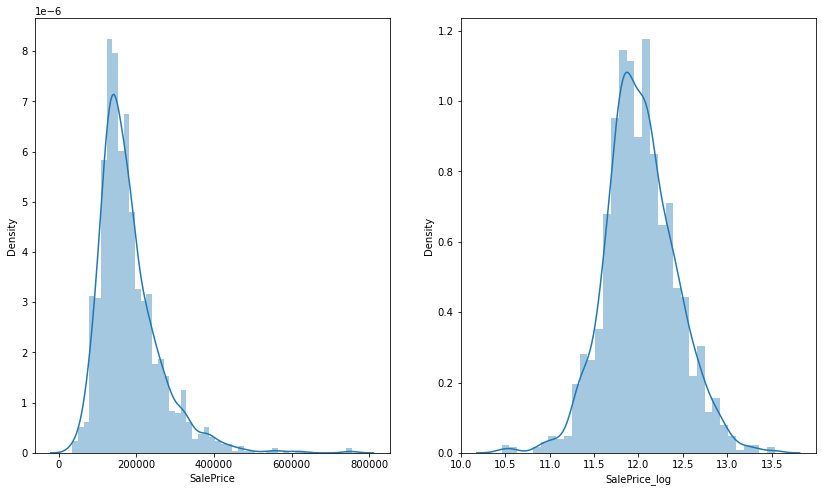

In [26]:
fig,axes = plt.subplots(1,2, figsize = (14,8))

sns.distplot(df_train['SalePrice'], ax = axes[0])
sns.distplot(df_train['SalePrice_log'], ax = axes[1])


### 1.3.1 Correlation of numerical features to SalePrice

How Exactly th numerical Features are correlated with the Target Variable (Sale Price) ? 

In [27]:
corrlation = df_train.corrwith(df_train['SalePrice']).abs().sort_values(ascending=False)[2:]

In [28]:
corrlation

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
dtype: float64

Text(0.5, 1.0, 'Correlation of Numerical Features with the Sale Price')

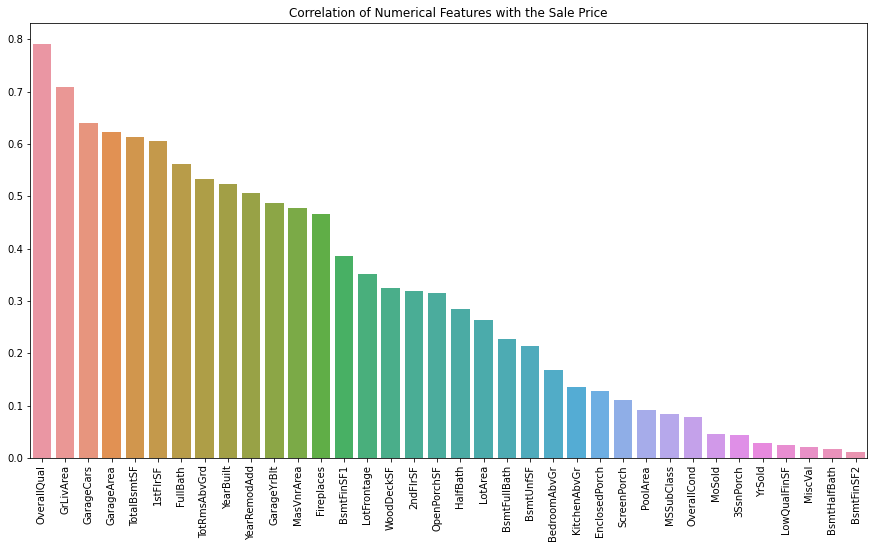

In [29]:
# lets Look at the Correlation in a better Visual way to make it more intuitive
fig, axes = plt.subplots(figsize = (15,8))
sns.barplot(x = corrlation.index, y = corrlation.values)
plt.xticks(rotation = 90)
plt.title('Correlation of Numerical Features with the Sale Price')

its expected that MOST of the Area Features are correlated with each others

In [30]:
df_train[corrlation.index[:10]]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

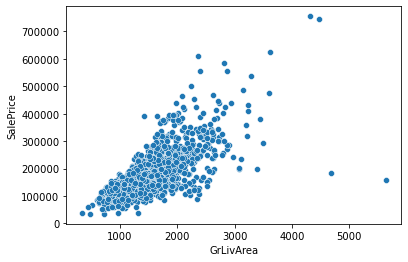

In [31]:
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'])

In [32]:
#There are Two outliers

### 1.3.2 Area features

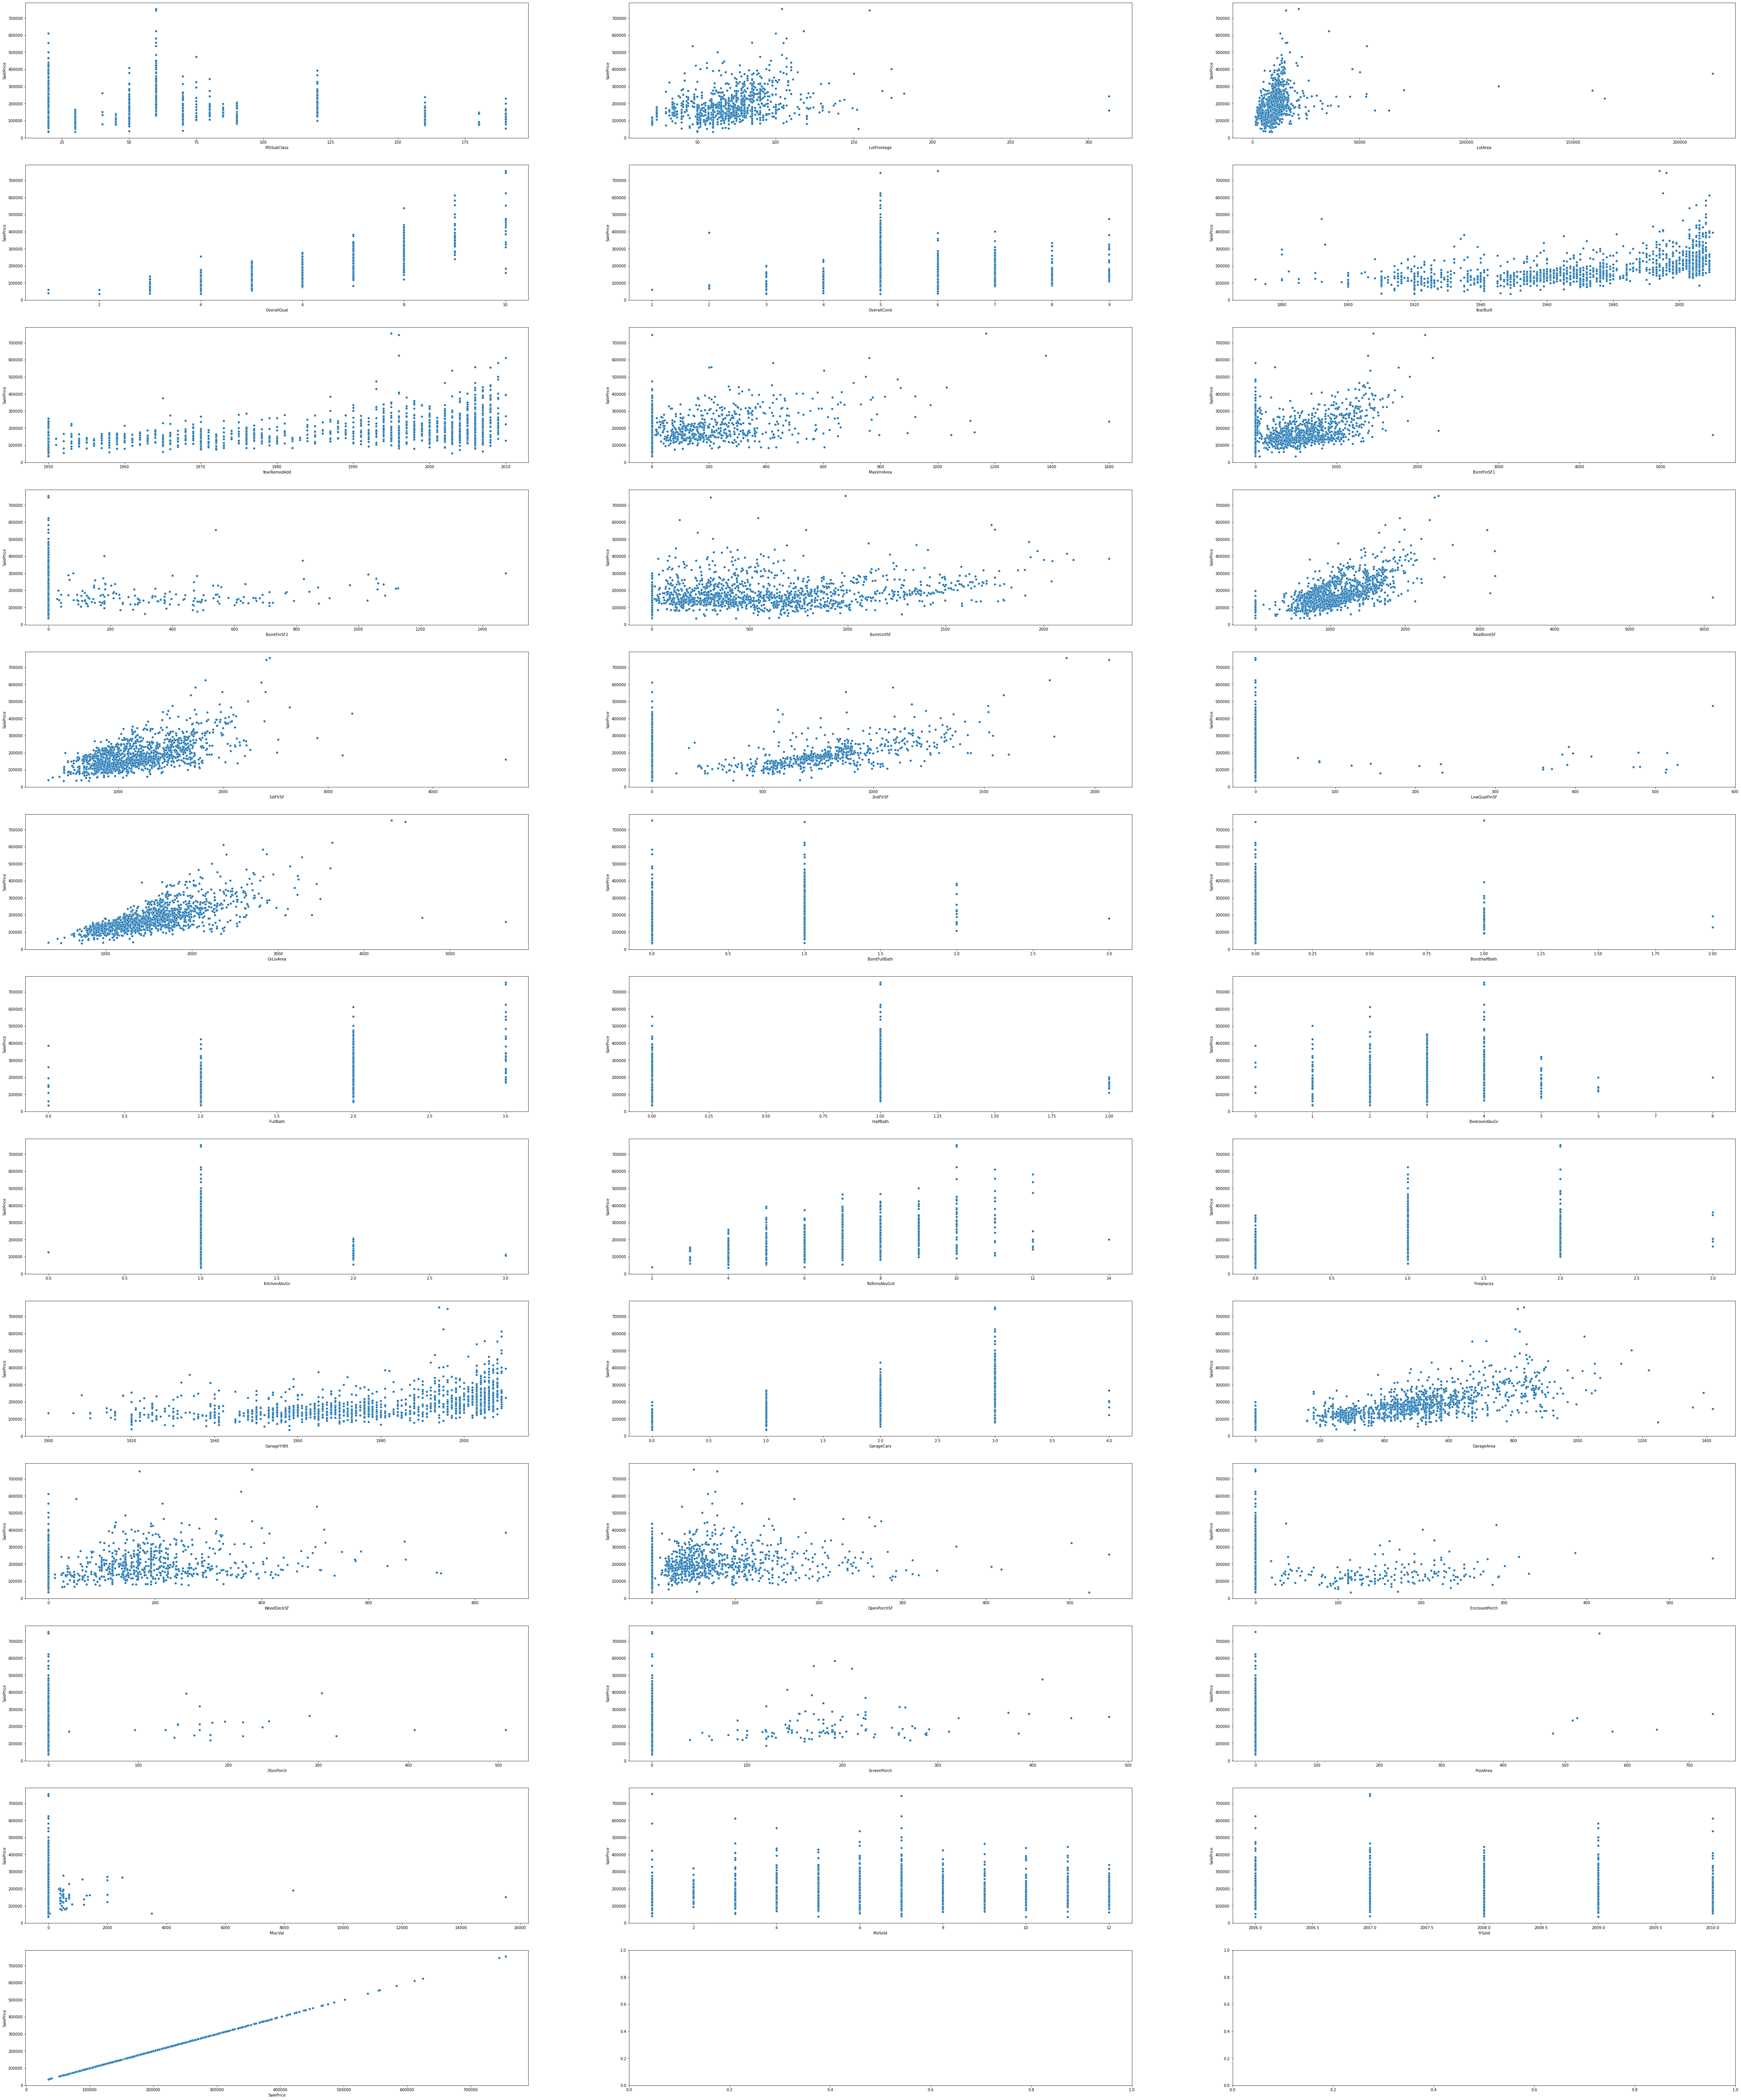

In [33]:
n_rows = 13
n_cols = 3
fet_no = 0
fig, axes = plt.subplots(n_rows, n_cols, figsize = (80,100))
for row in range(n_rows):
    for col in range(n_cols):
        if int(fet_no) < int(len(numerical_cols)):
            sns.scatterplot(x = df_train[numerical_cols[fet_no]],
                            y = df_train['SalePrice'], ax= axes[row][col])
            fet_no+=1

In [34]:
tr = go.Scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'], mode='markers', opacity= 0.7)
layout = dict(title = 'GrLiveArea VS SalePrice',
              xaxis = dict(title = 'GRLIVEAREA'),
              yaxis = dict(title = 'SalePrice')
              )
fig = dict(data = tr, layout = layout)
iplot(fig)

its Shown that there are some Outliers !! 

In [35]:
# Outliers in GrLiveArea
# We store the index of the two data points to the lower right,with SalePrice < 200 k and GrLivArea > 4000
outlier_GrLiveArea = df_train[df_train['GrLivArea'] > 4000]
outlier_GrLiveArea = outlier_GrLiveArea[outlier_GrLiveArea['SalePrice'] < 200000]

In [36]:
outlier_GrLiveArea

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
523,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,10,2007,New,Partial,184750,12.126759
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,480,0,1,2008,New,Partial,160000,11.982929


In [37]:
area_features = []
for col in df_train.columns:
    if 'SF' in df_train[col].name:
        area_features.append(col)

In [38]:
area_features

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [39]:
df_train['Sum of all sf Areas'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] +df_train['LowQualFinSF']
df_test['Sum of all sf Areas'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] +df_test['LowQualFinSF']

In [40]:
df_train[['GrLivArea', 'Sum of all sf Areas']]

,GrLivArea,Sum of all sf Areas
0,1710,1710
1,1262,1262
2,1786,1786
3,1717,1717
4,2198,2198
...,...,...
1455,1647,1647
1456,2073,2073
1457,2340,2340
1458,1078,1078


In [41]:
df_test[['GrLivArea', 'Sum of all sf Areas']]

,GrLivArea,Sum of all sf Areas
0,896,896
1,1329,1329
2,1629,1629
3,1604,1604
4,1280,1280
...,...,...
1454,1092,1092
1455,1092,1092
1456,1224,1224
1457,970,970


lets See how each of these individual Features correlated with the SalePrice

In [42]:
print(df_train['1stFlrSF'].corr(df_train['SalePrice']))
print(df_train['2ndFlrSF'].corr(df_train['SalePrice']))
print(df_train['LowQualFinSF'].corr(df_train['SalePrice']))

0.6058521846919148
0.31933380283206764
-0.025606130000679586


But after combining all these Features Together We find That the New Features that we Created is correlated by 0.709

In [43]:
print(df_train['Sum of all sf Areas'].corr(df_train['SalePrice']))

0.7086244776126522


In [44]:
print(df_train['GrLivArea'].corr(df_train['SalePrice']))

0.7086244776126522


For that We will drop thenew Column that we created as it already exists as GrLiveArea (SAME)

In [45]:
df_train.drop('Sum of all sf Areas', axis = 1, inplace = True)
df_test.drop('Sum of all sf Areas', axis = 1, inplace = True)

'GrLivArea' minus 'LowQualFinSF' which is equal to the sum of  
'1stFlrSF' + '2ndFlrSF' has a larger correlation to SalePrice than 'GrLivArea'

In [46]:
(df_train['1stFlrSF'] + df_train['2ndFlrSF']).corr(df_train['SalePrice'])

0.7168830793692811

lets plot a scatter plot for all area features VS the SalePrice

BsmtFinSF1 0.38641980624215316
BsmtFinSF2 -0.011378121450215136
BsmtUnfSF 0.21447910554696895
TotalBsmtSF 0.6135805515591956
1stFlrSF 0.6058521846919147
2ndFlrSF 0.3193338028320677
LowQualFinSF -0.02560613000067959
WoodDeckSF 0.3244134445681295
OpenPorchSF 0.31585622711605543


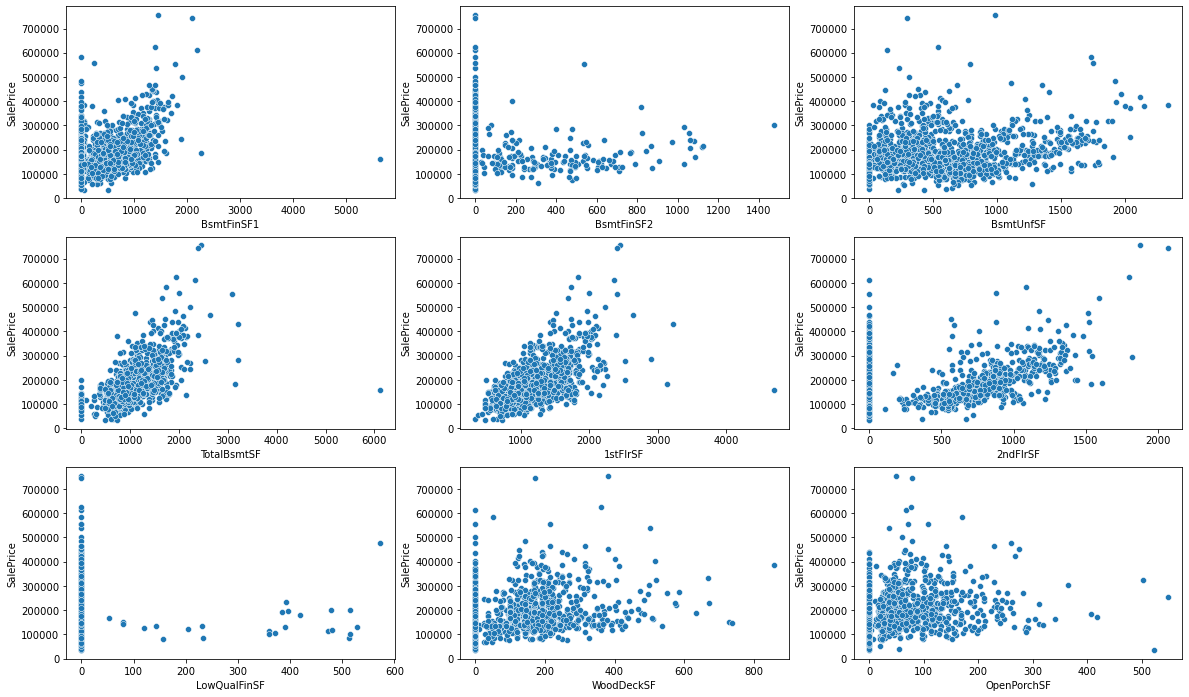

In [47]:
n_rows = 3
n_cols = 3
temp = 0
fig, axes = plt.subplots(n_rows,n_cols, figsize = (20,12))
for row in range(n_rows):
    for col in range (n_cols):
        if temp < len(area_features):
            sns.scatterplot(x = df_train[area_features[temp]], y = df_train['SalePrice'], ax = axes[row][col])
            print(area_features[temp],df_train['SalePrice'].corr(df_train[area_features[temp]]))
            temp += 1


lets add/create a feature and call it 'all_Liv_SF' which is the addition of the square feet for 'TotalBsmtSF , 1stFlrSF , 2ndFlrSF' 

In [48]:
df_train['all_Liv_SF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['all_Liv_SF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [49]:
# Correlation of the New feature with the SalePrice and SalePriceLog
print(df_train['all_Liv_SF'].corr(df_train['SalePrice']))
print(df_train['all_Liv_SF'].corr(df_train['SalePrice_log']))

0.7822600527979846
0.7772962148534484


its seen that the correlation of the new feature with the SalePrice is 0.78

its seen that the correlation of the new feature with the SalePrice Log is 0.77

lets add Another Feature 'all_SF' which is the addition of area features, 'GarageArea', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', ''ScreenPorch

In [50]:
df_train['all_SF'] = (df_train['all_Liv_SF']+df_train['GarageArea']+ df_train['MasVnrArea']
                    + df_train['WoodDeckSF'] + df_train['OpenPorchSF']+ df_train['ScreenPorch'])

df_test['all_SF'] = (df_test['all_Liv_SF']+df_test['GarageArea']+ df_test['MasVnrArea']
                    + df_test['WoodDeckSF'] + df_test['OpenPorchSF']+ df_test['ScreenPorch'])

In [51]:
print(df_train['SalePrice'].corr(df_train['all_SF']))
print(df_train['SalePrice_log'].corr(df_train['all_SF']))

0.8241059734384172
0.8198111123047586


In [52]:
# lets See if the Features we added are correlated with each others ? 

df_train['all_Liv_SF'].corr(df_train['all_SF'])

0.9632776366224405

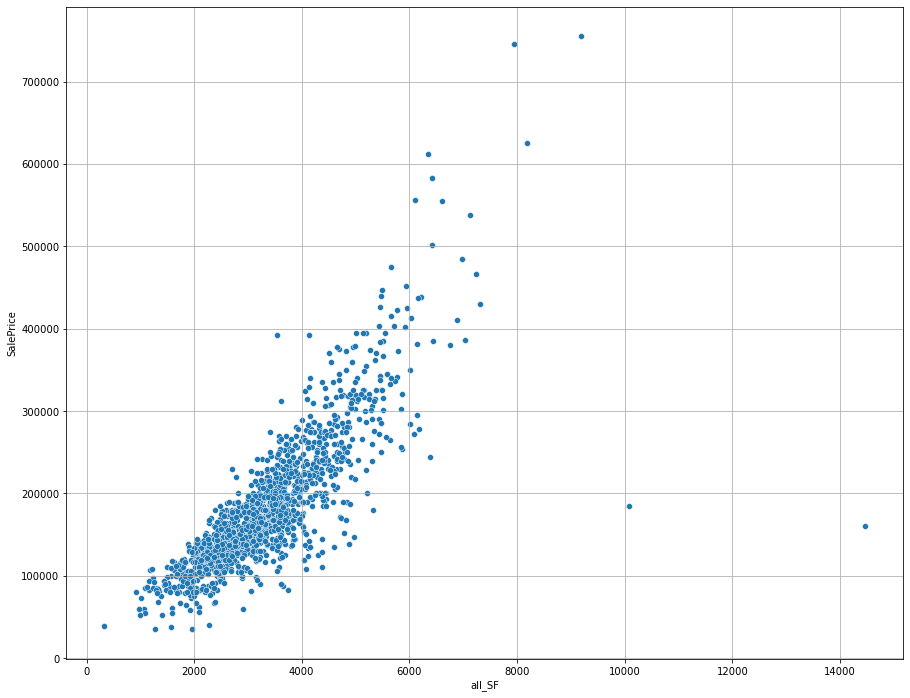

In [53]:
fig, axes = plt.subplots(figsize = (15,12))
sns.scatterplot(x = df_train['all_SF'], y = df_train['SalePrice'])
axes.grid()
plt.show()

there are Two Outliers at the lower Right !! Lets Remove Them 

In [54]:
all_sf_outliers = df_train[df_train['all_SF'] > 10000].index

In [55]:
all_sf_outliers

Int64Index([523, 1298], dtype='int64')

Notice that these are the same outliers in GrLiveArea that we found Earlier, But We didn't Drop them ,,, (Now we will do it on the Next Step )

In [56]:
df_train.drop(all_sf_outliers, inplace = True)

In [57]:
df_train.corr().abs()[['SalePrice', 'SalePrice_log']].sort_values(by = 'SalePrice', ascending = False)[2:16]

,SalePrice,SalePrice_log
all_SF,0.866747,0.860175
all_Liv_SF,0.832877,0.825326
OverallQual,0.795774,0.821404
GrLivArea,0.734968,0.725211
TotalBsmtSF,0.651153,0.647563
GarageCars,0.641047,0.681033
1stFlrSF,0.631530,0.620500
GarageArea,0.629217,0.656128
FullBath,0.562165,0.595899
TotRmsAbvGrd,0.537769,0.537702


Notice That After Dropping the Outliers , the (all_SF) Feature Has increased the Correlation with the SalePrice to 0.86

In [58]:
df_test.loc[all_sf_outliers]
# Do we have to Drop Them ? 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,all_Liv_SF,all_SF
523,160,RL,36.0,2448,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,10,2008,WD,Normal,2390.0,2997.0
1298,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2006,WD,Normal,2258.0,2835.0


### OverallQual with the Target Variable SalePrice?? 

In [59]:
df_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     16
2       3
1       2
Name: OverallQual, dtype: int64

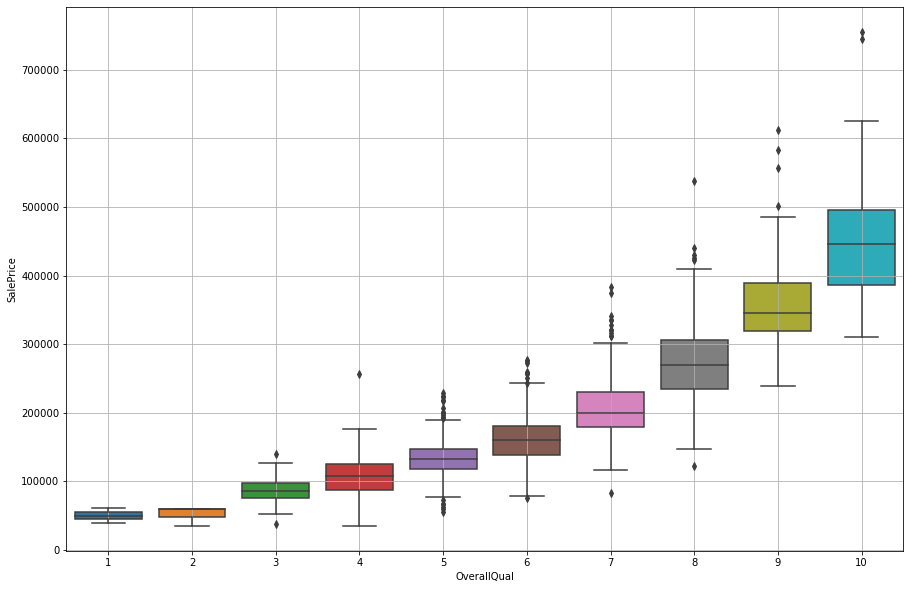

In [60]:
fig, axes = plt.subplots(figsize = (15,10))
sns.boxplot(x = df_train['OverallQual'], y = df_train['SalePrice'])
axes.grid()

its already expected , because after we look at the correlation between the SalePrice and the OverallQual which is equal to 0.795774 . this linear look is obvious !!

In [61]:
# Group by the 
df_train[['SalePrice', 'OverallQual']].groupby('OverallQual').describe()

SalePrice                                                    \
                count           mean            std       min       25%   
OverallQual                                                               
1                 2.0   50150.000000   15344.217152   39300.0   44725.0   
2                 3.0   51770.333333   14254.200796   35311.0   47655.5   
3                20.0   87473.750000   24688.567399   37900.0   75500.0   
4               116.0  108420.655172   29022.003886   34900.0   88000.0   
5               397.0  133523.347607   27107.330927   55993.0  118000.0   
6               374.0  161603.034759   36090.182933   76000.0  139125.0   
7               319.0  207716.423197   44466.259414   82500.0  179470.0   
8               168.0  274735.535714   63898.902253  122000.0  234557.5   
9                43.0  367513.023256   81278.174849  239000.0  318980.5   
10               16.0  471865.062500  135221.064284  310000.0  385937.5   

                                           
                  50%       75%       max  
OverallQual                                
1             50150.0   55575.0   61000.0  
2             60000.0   60000.0   60000.0  
3             86250.0   97500.0  139600.0  
4            108000.0  125500.0  256000.0  
5            133000.0  147000.0  228950.0  
6            160000.0  181000.0  277000.0  
7            200141.0  230750.0  383970.0  
8            269750.0  306250.0  538000.0  
9            345000.0  389716.0  611657.0  
10           445365.0  495000.0  755000.0

In [62]:
trace = []
for name, group in df_train[["SalePrice", "OverallQual"]].groupby("OverallQual"):
    trace.append( go.Box( y=group["SalePrice"].values, name=name ) )

fig = go.Figure(data=trace)
iplot(fig)

- there is an almost perfect linear increase of SalePrice with the OverallQual.  
- We notice that this feature is in fact categorical (ordinal), only the discrete values 1,2..10 occur.  
- Also there are a few outliers for some of the OverallQual values.  

lets Remove Those Outliers in (4,8,9,10):

In [63]:
outlier_OverallQual_4 = df_train[(df_train['OverallQual'] == 4) & (df_train['SalePrice'] > 200000)]
outlier_OverallQual_8 = df_train[(df_train['OverallQual'] == 8) & (df_train['SalePrice'] > 500000)]
outlier_OverallQual_9 = df_train[(df_train['OverallQual'] == 9) & (df_train['SalePrice'] > 500000)]
outlier_OverallQual_10 = df_train[(df_train['OverallQual'] == 10) & (df_train['SalePrice'] > 700000)]

In [64]:
outlier_overallQual = pd.concat([outlier_OverallQual_4, outlier_OverallQual_8, outlier_OverallQual_9,outlier_OverallQual_10])

In [65]:
outlier_overallQual[['SalePrice', 'OverallQual']]

,SalePrice,OverallQual
457,256000,4
769,538000,8
178,501837,9
803,582933,9
898,611657,9
1046,556581,9
691,755000,10
1182,745000,10


In [66]:
# Dropping These indices : 
df_train.drop(outlier_overallQual.index, inplace = True)

In [67]:
# lets Check if The correlation Value Changed After Dropping These Indices: 
df_train['SalePrice'].corr(df_train['OverallQual'])

0.8094003927215971

The Correlation increased Slightly after Dropping the Outliers .. :)

In [68]:
df_train.corr().abs()[['SalePrice', 'SalePrice_log']].sort_values(by = 'SalePrice', ascending=False)[2:16]

,SalePrice,SalePrice_log
all_SF,0.862866,0.853052
all_Liv_SF,0.823502,0.816708
OverallQual,0.809400,0.819386
GrLivArea,0.718054,0.712796
GarageCars,0.652310,0.677201
TotalBsmtSF,0.641396,0.633767
GarageArea,0.634881,0.649590
1stFlrSF,0.618476,0.604977
FullBath,0.555959,0.586060
YearBuilt,0.540550,0.588290


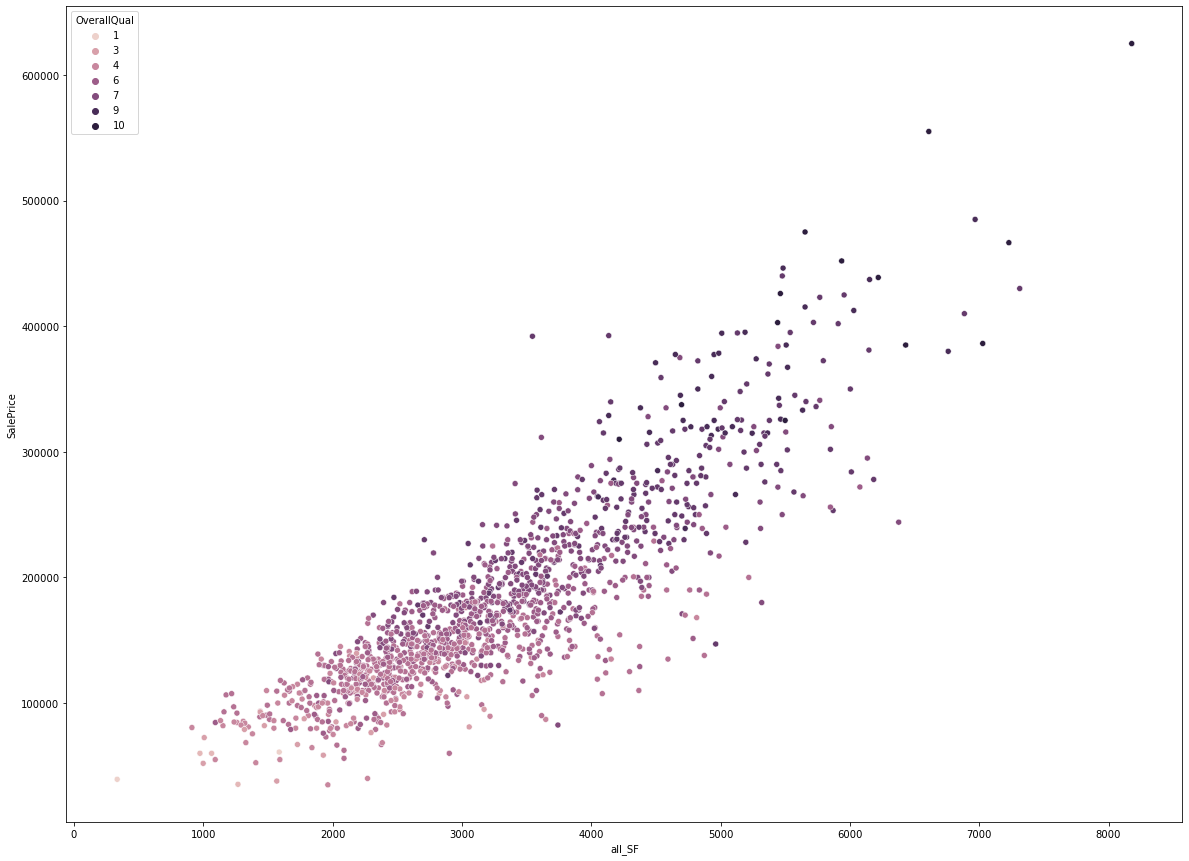

In [69]:
fig, axes = plt.subplots(figsize = (20,15))
sns.scatterplot(x = df_train['all_SF'], y = df_train['SalePrice'], hue=df_train['OverallQual'])
plt.show()
axes.grid()

As seen before in the simple xatter plot, there is a strong tendency for increasing SalePrice with a higher value for OverallQual.
But this color plot also shows a correlation of all_SF and OverallQual.  

So, the probability that a house has a large area increases with its Overall Quality.  
And vice versa: Quality increases with House size. 

This corrrelation is not necessary, one would expect that there are also small houses with high quality and big houses with low quality.  

It would be nice to know how the rating for OverallQual is calculated or estimated, 
but that info is not included in the data description.

In [70]:
# lets see the correlation between ''OverallQual' and the 'all_SF'
df_train['OverallQual'].corr(df_train['all_SF'])

0.7069255771139126

Other Numerical Features : 

In [71]:
print(df_train['OverallCond'].corr(df_train['SalePrice']))
print(df_train['OverallCond'].corr(df_train['SalePrice_log']))

-0.07497717939866402
-0.03224071772567881


In [72]:
print(df_train['MSSubClass'].corr(df_train['SalePrice']))
print(df_train['MSSubClass'].corr(df_train['SalePrice_log']))

-0.0862347384414969
-0.07250370227729265


### 1.4 Visulatization of Categorical Features

In [73]:
# whatare the categorical Featres in our Dataset
print(len(categorical_cols))
categorical_cols

38


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

#### Neighbrohood

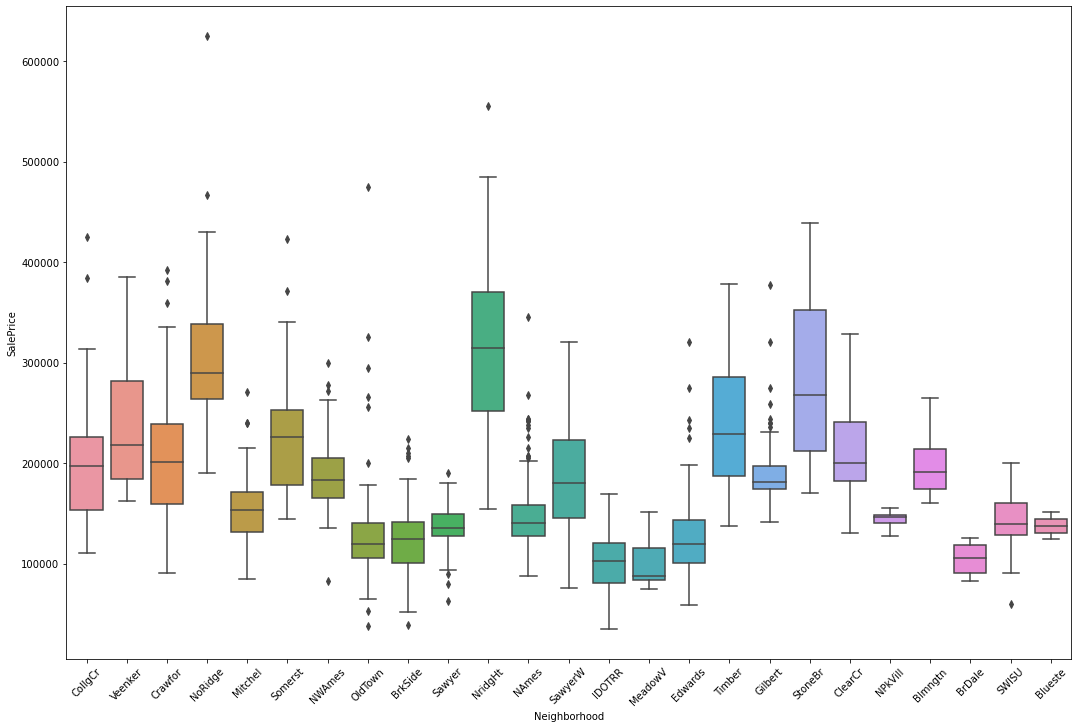

In [74]:
fig, axes = plt.subplots(figsize = (18,12))
sns.boxplot(x = df_train['Neighborhood'], y = df_train['SalePrice'])
plt.xticks(rotation = 45)
plt.show()

In [75]:
df_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber      38
IDOTRR      37
ClearCr     27
SWISU       25
StoneBr     22
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [76]:
from scipy.stats import f_oneway

grouped_data = df_train.groupby('Neighborhood')
categories = [group for group, data in grouped_data]
anova_results = f_oneway(*[data['SalePrice'] for group, data in grouped_data])
anova_results

F_onewayResult(statistic=74.01277473141555, pvalue=3.6174279503670876e-230)

#### MSZoning

In [77]:
from scipy.stats import f_oneway

grouped_data = df_train.groupby('MSZoning')
categories = [group for group, data in grouped_data]
anova_results = f_oneway(*[data['SalePrice'] for group, data in grouped_data])
anova_results

F_onewayResult(statistic=48.72798593033816, pvalue=1.720169940812831e-38)

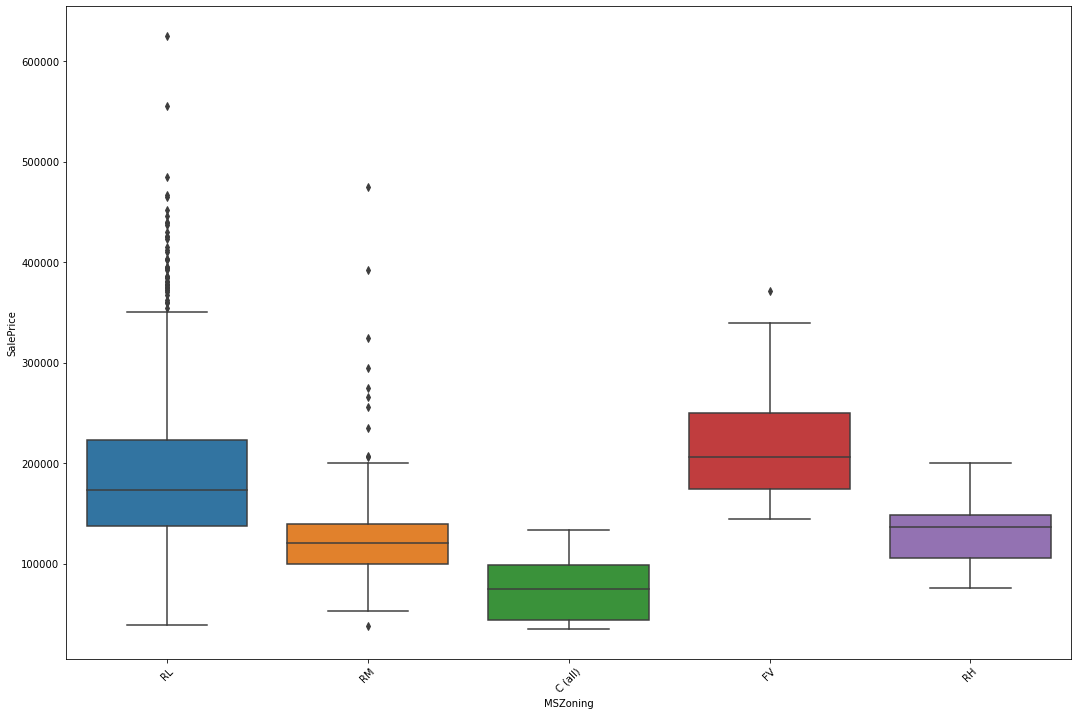

In [78]:
fig, axes = plt.subplots(figsize = (18,12))
sns.boxplot(x = df_train['MSZoning'], y = df_train['SalePrice'])
plt.xticks(rotation = 45)
plt.show()

# PART 2: Preprocessing and Pipelines

In [79]:
# lets check the shape of both train and test set 
print(df_train.shape)
print(df_test.shape)

(1450, 78)
(1459, 76)


In [80]:
y = df_train['SalePrice']
y_log = df_train['SalePrice_log'] # Because we might need it for Comparison Purposes


# Drop the Target Varibles 
df_train.drop(['SalePrice', 'SalePrice_log'], axis = 1, inplace = True)

X_1 = df_train
X_2 = df_train

In [81]:
print(df_train.shape)
print(df_test.shape)
print(X_1.shape)
print(X_2.shape)
print(y.shape)
print(y_log.shape)

(1450, 76)
(1459, 76)
(1450, 76)
(1450, 76)
(1450,)
(1450,)


### 2.1 The PipeLine Approach

The purpose of the pipeline in scikit-learn is to assemble several steps into one object, where each step is a tuple consisting of a name and an estimator or a transformer. The pipeline enables the user to cross-validate the entire workflow, including all the steps, and to set different parameters for each step using their names and the parameter name separated by '__'.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### 2.2 Preprocessing PipeLine 

In [83]:
## First we have to seperate the numerical features and the categorical Features (in Two lists)
# i believe we have done this Earlier
numerical_fets = df_train.select_dtypes(exclude= 'object').columns.to_list()
categorical_fets = df_train.select_dtypes(include= 'object').columns.to_list()

In [84]:
print(numerical_fets)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'all_Liv_SF', 'all_SF']


In [85]:
print(categorical_fets)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


#### Pipeline for preprocessing (Numerical) Features 

In [86]:
# Imputer to Fix the Missing Values issue .... Scaler to Scale the Data
numerical_transformer = Pipeline(steps = [
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])

#### Pipeline for preprocessing (Categorical) Features 

In [87]:
# Imputer to Fix the Missing Values issue .... Encoder to Encode the Categories (to numbers)
categorical_transformer = Pipeline(steps = [
('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
('onehot', OneHotEncoder(handle_unknown='ignore'))])


                                        Combining Them

In [88]:
preprocessor = ColumnTransformer(
                transformers=[
                 ('num', numerical_transformer, numerical_fets), 
                 ('cat', categorical_transformer, categorical_fets)])

### 2.3 Appending Regressors to PipeLine 

#### 2.3.1 Linear Models

                                Default Model Parameters

**LinearRegression** minimizes the residual sum of squares between the observed targets and the targets predicted by the linear approximation = Ordinary Least Squares fit  

**Ridge** regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares.  

**HuberRegressor** is different to Ridge because it applies a linear loss to samples that are classified as outliers.

In [89]:
## Linear Regression Pipe 
pipe_linear = Pipeline(
        steps = [('preprocessor', preprocessor),
                ('Linear', LinearRegression())])

## Ridge regression Pipe
pipe_ridge = Pipeline(
        steps = [('preprocessor', preprocessor),
                ('Ridge', Ridge(random_state= 5))])

## Huber Regression Pipe
pipe_Huber = Pipeline([('preprocessor', preprocessor),
                       ('Huber', HuberRegressor())])

## LASSO Regression Pipe
pipe_Lasso = Pipeline([('preprocessor', preprocessor),
                     ('LASSO', Lasso(random_state = 5 ))])

## Elastic Net Regression Pipe
pipe_ElaNet = Pipeline([('preprocessor', preprocessor),
                     ('ElaNet', ElasticNet(random_state= 5 ))])


## BayesianRidge Regression Pipe
pipe_BayesRidge = Pipeline([('preprocessor', preprocessor),
                     ('ElaNet', BayesianRidge(n_iter = 500, compute_score= True))])

#### 2.3.2 Ensemble Models

In [90]:
## GradientBoosting Regression Pipe
pipe_GBR = Pipeline([('preprocessor', preprocessor),
                     ('GBR', GradientBoostingRegressor(random_state = 5 ))])

## XGB Regression Pipe
pipe_XGB = Pipeline([('preprocessor', preprocessor),
                     ('XGB', XGBRegressor(random_state= 5 , objective= 'reg:squarederror',
                                          metric = 'rmse', n_thread = -1))])

## LGBM Regression
pipe_LGBM = Pipeline([('preprocessor', preprocessor),
                     ('LGBM', LGBMRegressor(random_state= 5 , objective= 'regression',
                                          metric = 'rmse'))])

## AdaBoost Regression
pipe_ADA = Pipeline([('preprocessor', preprocessor),
                     ('ADA', AdaBoostRegressor(DecisionTreeRegressor(), random_state = 5,
                                               loss = 'exponential'))])

# PART 3: CrossValidation

We now run a 5 fold cross validation for each pipeline/model:  
Linear Models: Linear Regression, Ridge, Lasso, Elastic Net  
Ensembles: GBR, XGB, LGBM, ADA  
For this we create loops over two list of pipelines (Linear models and Ensembles) and calculate  
the mean, std and min score (=error) for every model.  
By this we get a first estimate for the different regression pipelines (Linear models and Ensembles):   
We fit the the data (features X and target y) using the default model parameters.

In [91]:
import warnings 
import contextlib
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=xgb.UserWarning)


### 3.1 Looping OverLinear Models ! 

In [92]:
linear_list_pipes = [pipe_linear, pipe_ridge, pipe_Huber, pipe_Lasso, pipe_ElaNet]

In [93]:
print('Model', '\t', 'Mean RMSE', '\t', '  STD', '\t', '      ','Min RMSE')
print('-' * 50)
for pipe in linear_list_pipes:
        scores = cross_val_score(pipe, X_1, y_log, scoring='neg_mean_squared_error', cv = 5)
        scores = np.sqrt(-scores)
        print(pipe.steps[1][0], '\t',
              '{:08.6f}'.format(np.mean(scores)), '\t',
              '{:08.6f}'.format(np.std(scores)), '\t',
              '{:08.6f}'.format(np.min(scores)))

Model 	 Mean RMSE 	   STD 	        Min RMSE
--------------------------------------------------
Linear 	 0.125445 	 0.010452 	 0.109575
Ridge 	 0.117637 	 0.008555 	 0.105585
Huber 	 0.141238 	 0.007907 	 0.131625
LASSO 	 0.389986 	 0.018456 	 0.369340
ElaNet 	 0.389986 	 0.018456 	 0.369340


pipe_BayesRidge is Throwing an Error : 

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

Linear Regression and especially Ridge model give quite good results already with default parameters.  
For Huber, Lasso and Elastic Net we need to tune hyperparameters (see Part 4: GridSearchCV)

### 3.1 Looping Over Ensemble Models ! 

In [94]:
enesemble_pipes_list = [pipe_GBR, pipe_XGB, pipe_LGBM, pipe_ADA]

In [95]:
print('Model', '\t', 'Mean RMSE', '\t', '  STD', '\t', '      ','Min RMSE')
print('-' * 50)
for pipe in enesemble_pipes_list:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=FutureWarning)
        scores = cross_val_score(pipe, X_1, y_log, scoring='neg_mean_squared_error', cv = 5)
        scores = np.sqrt(-scores)
        print(pipe.steps[1][0], "\t", 
            '{:08.6f}'.format(np.mean(scores)), "\t",  
            '{:08.6f}'.format(np.std(scores)),  "\t", 
            '{:08.6f}'.format(np.min(scores)))

Model 	 Mean RMSE 	   STD 	        Min RMSE
--------------------------------------------------
GBR 	 0.121358 	 0.007096 	 0.111195
[07:35:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "metric", "n_thread" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:35:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "metric", "n_thread" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0

GradientBoost Regressor and LGBM (GradientBoost Regressor) Gave Good results with the default parameters

 # Part 4: GridSearchCV

In [96]:
lis_scalers = [StandardScaler()]

#### 4.1 Linear Models GSCV

                                Linear Regression 

**fit_intercept** : boolean, optional, default True  

**normalize** : boolean, optional, default False  

**copy_X** : boolean, optional, default True  

**n_jobs** : int or None, optional (default=None)  
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [97]:
parametets_linear = {'preprocessor__num__scaler': lis_scalers,
                     'Linear__fit_intercept': [True, False],
                     'Linear__normalize':[True, False]}

gscv_linear = GridSearchCV(pipe_linear, parametets_linear,
                            cv =  5 , verbose= 0, n_jobs = -1, scoring = 'neg_mean_squared_error')

gscv_linear.fit(X_1, y_log)

/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1...
                                                                          'Foundation',
                                                                          'BsmtQual',
                                                                          'BsmtCond',
                                                                          'BsmtExposure',
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'KitchenQual', ...])])),
                                       ('Linear', LinearRegression())]),
             n_jobs=-1,
             param_grid={'Linear__fit_intercept': [True, False],
                         'Linear__normalize': [True, False],
                         'preprocessor__num__scaler': [StandardScaler()]},
             scoring='neg_mean_squared_error')

In [98]:
print('The Best score for GSCV Linear Regression model is ',-gscv_linear.best_score_)
print('The Gridsearchcv found the Best parameter for Linear Regression model are ',gscv_linear.best_params_)

The Best score for GSCV Linear Regression model is  0.015839779682681392
The Gridsearchcv found the Best parameter for Linear Regression model are  {'Linear__fit_intercept': True, 'Linear__normalize': True, 'preprocessor__num__scaler': StandardScaler()}


                                 RIDGE Regression

**alpha** :Regularization strength, must be a positive float  

**fit_intercept** : bool, default True  

**normalize** : boolean, optional, default False  

**copy_X** : boolean, optional, default True  

**max_iter** : int  

**tol** : float  -- Precision of the solution  

**solver** : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}  
Solver to use in the computational routines

In [99]:
parametets_ridge = {'preprocessor__num__scaler': lis_scalers,
                    'Ridge__alpha' : [7,8,9],
                    'Ridge__fit_intercept' : [True, False],
                    'Ridge__normalize': [True, False]}

gscv_ridge = GridSearchCV(pipe_ridge, parametets_ridge, n_jobs = -1, 
                          verbose= 0, cv = 5, scoring = 'neg_mean_squared_error')

gscv_ridge.fit(X_1, y_log)

/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a prepro

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1...
                                                                          'BsmtCond',
                                                                          'BsmtExposure',
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'KitchenQual', ...])])),
                                       ('Ridge', Ridge(random_state=5))]),
             n_jobs=-1,
             param_grid={'Ridge__alpha': [7, 8, 9],
                         'Ridge__fit_intercept': [True, False],
                         'Ridge__normalize': [True, False],
                         'preprocessor__num__scaler': [StandardScaler()]},
             scoring='neg_mean_squared_error')

In [100]:
print('The Best score for GSCV Ridge Regression model is ',-gscv_ridge.best_score_)
print('The Gridsearchcv found the Best parameter for Ridge Regression model are ',gscv_ridge.best_params_)

The Best score for GSCV Ridge Regression model is  0.013016766415634826
The Gridsearchcv found the Best parameter for Ridge Regression model are  {'Ridge__alpha': 9, 'Ridge__fit_intercept': True, 'Ridge__normalize': False, 'preprocessor__num__scaler': StandardScaler()}


                                      Huber Regression

**epsilon** : > 1.0, default 1.35  
controls the number of samples that should be classified as outliers.  
The smaller the epsilon, the more robust it is to outliers.

**max_iter** : int, default 100  
Maximum number of iterations that scipy.optimize.fmin_l_bfgs_b should run for.  

**alpha** : float, default 0.0001  
Regularization parameter.  

**fit_intercept** : bool, default True

In [101]:
parameters_huber = {'preprocessor__num__scaler': lis_scalers,
                    'Huber__epsilon': [1.3, 1.35, 1.4],
                    'Huber__max_iter' : [150, 200, 250],
                    'Huber__alpha': [0.0005, 0.001, 0.002],
                    'Huber__fit_intercept': [True],}
gscv_huber = GridSearchCV(pipe_Huber, parameters_huber, n_jobs= -1,
                          verbose = 0, cv = 5, scoring = 'neg_mean_squared_error')
gscv_huber.fit(X_1, y_log)

/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to conv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1...
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'KitchenQual', ...])])),
                                       ('Huber', HuberRegressor())]),
             n_jobs=-1,
             param_grid={'Huber__alpha': [0.0005, 0.001, 0.002],
                         'Huber__epsilon': [1.3, 1.35, 1.4],
                         'Huber__fit_intercept': [True],
                         'Huber__max_iter': [150, 200, 250],
                         'preprocessor__num__scaler': [StandardScaler()]},
             scoring='neg_mean_squared_error')

In [102]:
print('The Best score for GSCV Huber Regression model is ',-gscv_huber.best_score_)
print('The Gridsearchcv found the Best parameter for Huber Regression model are ')
gscv_huber.best_params_

The Best score for GSCV Huber Regression model is  0.0160989118617847
The Gridsearchcv found the Best parameter for Huber Regression model are 


{'Huber__alpha': 0.002,
 'Huber__epsilon': 1.35,
 'Huber__fit_intercept': True,
 'Huber__max_iter': 200,
 'preprocessor__num__scaler': StandardScaler()}

                                    LASSO Regression

In [110]:

parameters_Lasso = {'preprocessor__num__scaler': []],
                    'Lasso__alpha': [0.0005, 0.001],
                    'Lasso__fit_intercept': [True],
                    'Lasso__normalize': [True, False] }

gscv_Lasso = GridSearchCV(pipe_Lasso, parameters_Lasso, n_jobs = -1,
                         scoring = 'neg_mean_squared_error', verbose= 1 , cv = 5 )

gscv_Lasso.fit(X_1, y_log)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


ValueError: Invalid parameter 'Lasso' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('LASSO', Lasso(random_state=5))]). Valid parameters are: ['memory', 'steps', 'verbose'].

                                 ElaNet Regression

In [109]:
parameters_ElaNet = {'ElaNet__alpha': [0.0005,0.001],
                     'ElaNet__l1_ratio':[0.85, 0.9],
                     'ElaNet__normalize': [True, False]}
gscv_ElaNet = GridSearchCV(pipe_ElaNet, parameters_ElaNet, n_jobs = -1,
                           scoring = 'neg_mean_squared_error', verbose = 1, cv = 5)

gscv_ElaNet.fit(X_1, y_log)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/home/mosab/miniconda3/envs/data-science-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1...
                                                                          'Foundation',
                                                                          'BsmtQual',
                                                                          'BsmtCond',
                                                                          'BsmtExposure',
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'KitchenQual', ...])])),
                                       ('ElaNet', ElasticNet(random_state=5))]),
             n_jobs=-1,
             param_grid={'ElaNet__alpha': [0.0005, 0.001],
                         'ElaNet__l1_ratio': [0.85, 0.9],
                         'ElaNet__normalize': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)